# I really like this dataset! It's turning out to be my favorite of the three I've used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pwd

'c:\\Users\\ghodg\\daimil9\\projects\\space-launch-exploratory'

In [3]:
launch_df = pd.read_csv("data/Space_Corrected.csv")

In [4]:
launch_df.shape

(4324, 9)

In [5]:
launch_df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [6]:
cleaned_launch_df = launch_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
cleaned_launch_df['Date'] = cleaned_launch_df['Datum'].str[:16]
cleaned_launch_df.drop(columns=['Datum'], inplace=True)
cleaned_launch_df['Date'] = pd.to_datetime(cleaned_launch_df['Date'], format='%a %b %d, %Y')
cleaned_launch_df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03


Cleaned up the launch dataframe to what we needed, and converted the 'Datum' column that was using strings to datetime to be more useful down the line. Honestly had to do some googling since I wasn't too well versed on datetime as of yet

In [7]:
company_names = sorted(launch_df['Company Name'].unique())
company_names

['AEB',
 'AMBA',
 'ASI',
 'Arianespace',
 "Arm??e de l'Air",
 'Blue Origin',
 'Boeing',
 'CASC',
 'CASIC',
 'CECLES',
 'CNES',
 'Douglas',
 'EER',
 'ESA',
 'Eurockot',
 'ExPace',
 'Exos',
 'General Dynamics',
 'IAI',
 'ILS',
 'IRGC',
 'ISA',
 'ISAS',
 'ISRO',
 'JAXA',
 'KARI',
 'KCST',
 'Khrunichev',
 'Kosmotras',
 'Land Launch',
 'Landspace',
 'Lockheed',
 'MHI',
 'MITT',
 'Martin Marietta',
 'NASA',
 'Northrop',
 'OKB-586',
 'OneSpace',
 'RAE',
 'RVSN USSR',
 'Rocket Lab',
 'Roscosmos',
 'SRC',
 'Sandia',
 'Sea Launch',
 'SpaceX',
 'Starsem',
 'ULA',
 'US Air Force',
 'US Navy',
 'UT',
 'VKS RF',
 'Virgin Orbit',
 'Yuzhmash',
 'i-Space']

Was curious about all the different agencies that had launches in this dataset. Got them, and added them to a .txt file for future use

In [8]:
spacex_name = 'SpaceX'
spacex = cleaned_launch_df[cleaned_launch_df['Company Name'].str.match(spacex_name)]
spacex

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,2020-07-20
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success,2020-06-30
20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.0,Success,2020-06-13
...,...,...,...,...,...,...,...
763,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",Falcon 1 | RazakSat,StatusRetired,7.0,Success,2009-07-14
800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",Falcon 1 | RatSat,StatusRetired,7.0,Success,2008-09-28
808,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",Falcon 1 | Flight 3,StatusRetired,7.0,Failure,2008-08-03
879,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",Falcon 1 | DemoSat,StatusRetired,7.0,Failure,2007-03-21


In [9]:
nasa_name = 'NASA'
nasa = cleaned_launch_df[cleaned_launch_df['Company Name'].str.match(nasa_name)]
nasa

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
682,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Atlantis | STS-135,StatusRetired,450.0,Success,2011-07-08
687,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Endeavour | STS-134,StatusRetired,450.0,Success,2011-05-16
695,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-133,StatusRetired,450.0,Success,2011-02-24
726,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Atlantis | STS-132,StatusRetired,450.0,Success,2010-05-14
733,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-131,StatusRetired,450.0,Success,2010-04-05
...,...,...,...,...,...,...,...
4243,NASA,"LC-5, Cape Canaveral AFS, Florida, USA",Mercury-Redstone | Mercury-Redstone 1 (MR-1),StatusRetired,NaN,Failure,1960-11-21
4257,NASA,"LC-14, Cape Canaveral AFS, Florida, USA",Atlas-D Mercury | Mercury-Atlas 1 (MA-1),StatusRetired,NaN,Failure,1960-07-29
4280,NASA,"LC-14, Cape Canaveral AFS, Florida, USA",Atlas-D Mercury | Big Joe 1,StatusRetired,NaN,Partial Failure,1959-09-09
4296,NASA,"SLC-17A, Cape Canaveral AFS, Florida, USA",Thor-DM 18 Able I | Pioneer 2,StatusRetired,NaN,Failure,1958-11-08


That lead me to be curious about just spacex and nasa launches

In [10]:
combined_names = ['SpaceX' , 'NASA', 'ULA', 'US Air Force', 'US Navy']
combined_nasa_spacex = cleaned_launch_df[cleaned_launch_df['Company Name'].str.contains('|'.join(combined_names))]
combined_nasa_spacex

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,2020-07-20
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success,2020-06-30
...,...,...,...,...,...,...,...
4312,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard SLV-1,StatusRetired,NaN,Failure,1958-05-28
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,1958-04-28
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard 1,StatusRetired,NaN,Success,1958-03-17
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05


This lead to a bit of patriotism on my part. Wanted to combine all the major players that the US had in the game during this timeframe

In [11]:
cutoff_date = pd.to_datetime('2000-01-01') ## Fall of the Soviet Union date

america_rahh_df = combined_nasa_spacex[combined_nasa_spacex['Date'] > cutoff_date]
america_rahh_df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,2020-07-20
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success,2020-06-30
...,...,...,...,...,...,...,...
1162,NASA,"LC-39B, Kennedy Space Center, Florida, USA",Space Shuttle Endeavour | STS-97,StatusRetired,450.0,Success,2000-11-30
1172,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-92,StatusRetired,450.0,Success,2000-10-11
1179,NASA,"LC-39B, Kennedy Space Center, Florida, USA",Space Shuttle Atlantis | STS-106,StatusRetired,450.0,Success,2000-09-08
1194,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Atlantis | STS-101,StatusRetired,450.0,Success,2000-05-19


RAHHHHHH AMERICA. Decided to want to see how the US space launches compared after the fall of the soviet union. Possible research question in the making?

In [12]:
launch_counts = america_rahh_df.groupby(['Date', 'Company Name', 'Status Mission']).size().reset_index(name='Launch Count')
launch_counts.sample(20)


,Date,Company Name,Status Mission,Launch Count
240,2018-11-15,SpaceX,Success,1
21,2006-12-10,NASA,Success,1
76,2010-02-08,NASA,Success,1
33,2007-10-11,ULA,Success,1
51,2008-10-25,ULA,Success,1
30,2007-08-08,NASA,Success,1
13,2002-06-05,NASA,Success,1
173,2016-04-08,SpaceX,Success,1
8,2001-07-12,NASA,Success,1
31,2007-09-18,ULA,Success,1


In [13]:
grouped_counts = launch_counts.groupby(['Company Name', launch_counts['Date'].dt.year])['Launch Count'].sum().reset_index()
grouped_counts


,Company Name,Date,Launch Count
0,NASA,2000,5
1,NASA,2001,6
2,NASA,2002,5
3,NASA,2003,1
4,NASA,2005,1
5,NASA,2006,3
6,NASA,2007,3
7,NASA,2008,4
8,NASA,2009,6
9,NASA,2010,3


In [14]:
status_counts = launch_counts.groupby(['Company Name', launch_counts['Date'].dt.year, 'Status Mission'])['Launch Count'].sum().reset_index()
status_pivot = status_counts.pivot_table(index=['Company Name', 'Date'], columns='Status Mission', values='Launch Count', fill_value=0).reset_index()
status_pivot


Status Mission,Company Name,Date,Failure,Partial Failure,Prelaunch Failure,Success
0,NASA,2000,0.0,0.0,0.0,5.0
1,NASA,2001,0.0,0.0,0.0,6.0
2,NASA,2002,0.0,0.0,0.0,5.0
3,NASA,2003,1.0,0.0,0.0,0.0
4,NASA,2005,0.0,0.0,0.0,1.0
5,NASA,2006,0.0,0.0,0.0,3.0
6,NASA,2007,0.0,0.0,0.0,3.0
7,NASA,2008,0.0,0.0,0.0,4.0
8,NASA,2009,0.0,0.0,0.0,6.0
9,NASA,2010,0.0,0.0,0.0,3.0


Wanted to count the launches by year and company name. The thought was there, but as you can see below, it didnt really work out the way I wanted it to haha

c:\Users\ghodg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghodg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


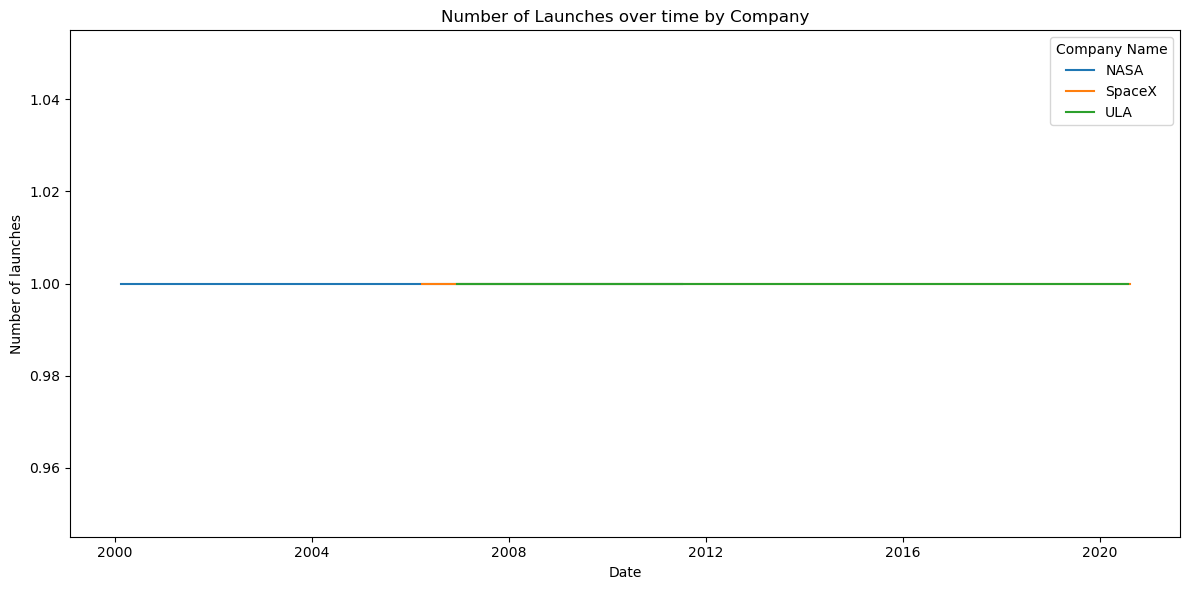

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Launch Count', hue='Company Name', data=launch_counts)
plt.title('Number of Launches over time by Company')
plt.xlabel('Date')
plt.ylabel('Number of launches')
plt.tight_layout()

# YIKES
lets fix that real quick

In [16]:
grouped_counts = launch_counts.groupby(['Company Name', launch_counts['Date'].dt.year])['Launch Count'].sum().reset_index()
grouped_counts


,Company Name,Date,Launch Count
0,NASA,2000,5
1,NASA,2001,6
2,NASA,2002,5
3,NASA,2003,1
4,NASA,2005,1
5,NASA,2006,3
6,NASA,2007,3
7,NASA,2008,4
8,NASA,2009,6
9,NASA,2010,3


That was the issue. Had to group the launch counts into a new column. This gave me some issues, and again had to google a bit to find the current use and came to the realiziation that dt.year was a thing lol. Summed and added into the new column

c:\Users\ghodg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghodg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


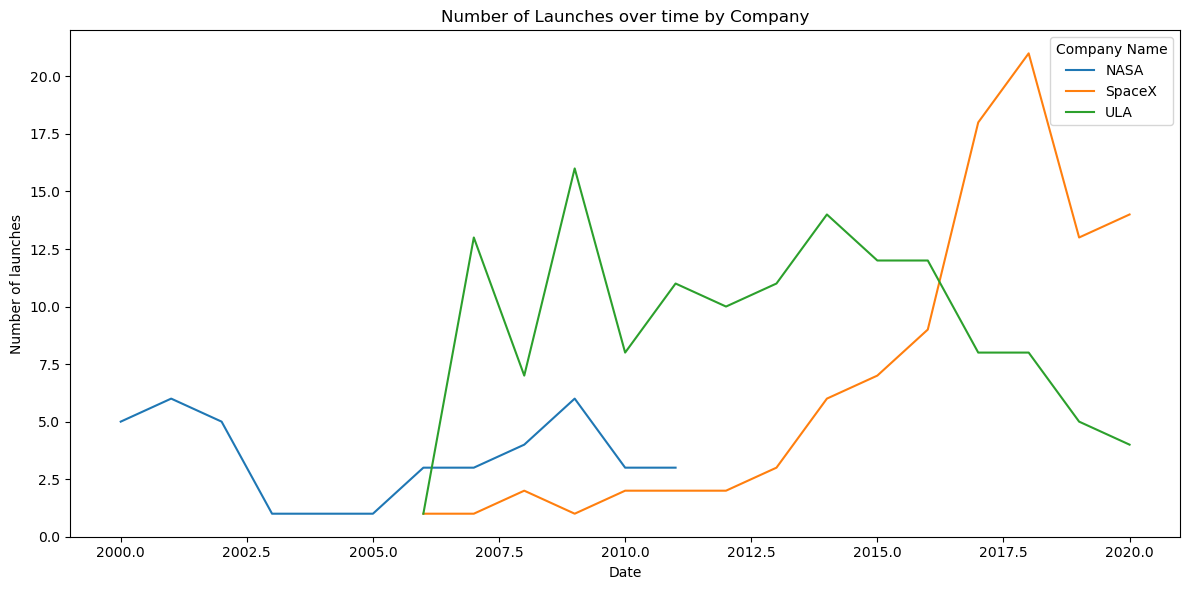

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Launch Count', hue='Company Name', data=grouped_counts, markers='o')
plt.title('Number of Launches over time by Company')
plt.xlabel('Date')
plt.ylabel('Number of launches')
plt.tight_layout()

This looks okay I guess, but maybe a bar graph would be better?

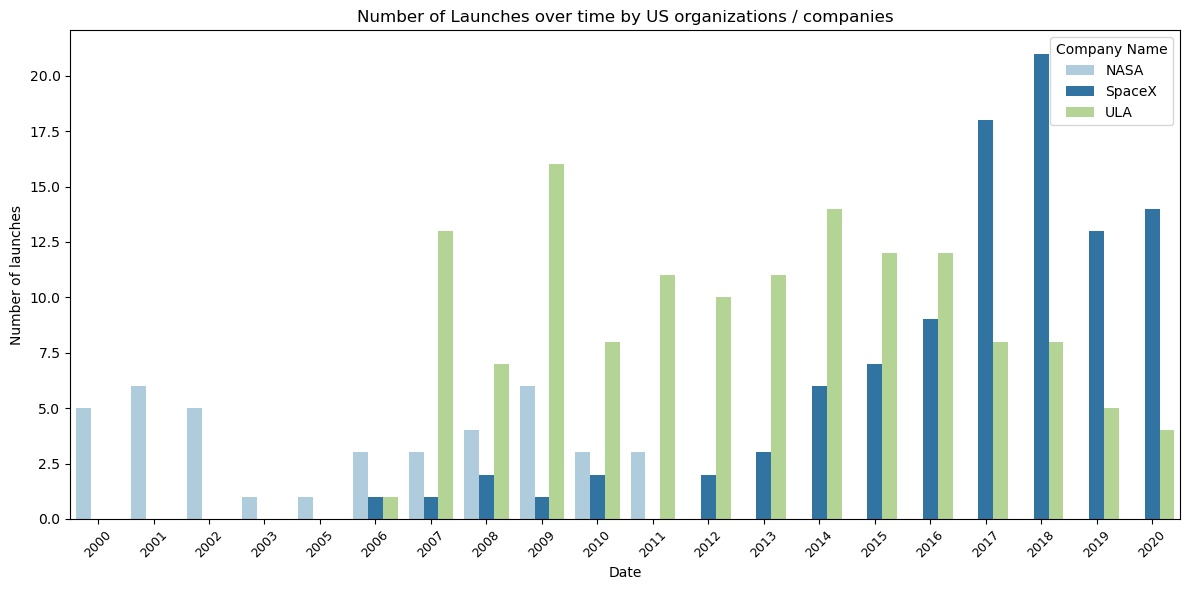

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='Date', y='Launch Count', hue='Company Name', data=grouped_counts, palette='Paired')
plt.title('Number of Launches over time by US organizations / companies')
plt.xlabel('Date')
plt.ylabel('Number of launches')
plt.xticks(rotation=45, size=9)
plt.tight_layout()


Wow this actually looks professional. I really like the 'paired' palette tbh. All I did was copy the same code from above, rotated the text and changed the color palette. Seaborn > all

Im just now realizing this is only showing the dates directly after the year the Soviet Union fell. What about the dates leading up to it? Were we launching a lot more then slowed down with NASA?

Just from the above bar graph, it seems like NASA kind of stagnated a bit, at least after the fall of the USSR.

In [19]:
combined_names_usa_ussr = ['SpaceX' , 'NASA', 'ULA', 'US Air Force', 'US Navy', 'Roscosmos', 'RVSN USSR']
combined_usa_ussr = cleaned_launch_df[cleaned_launch_df['Company Name'].str.contains('|'.join(combined_names_usa_ussr))]
combined_usa_ussr

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,2020-07-23
...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard 1,StatusRetired,NaN,Success,1958-03-17
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03


In [20]:
updated_launch_counts = combined_usa_ussr.groupby(['Date', 'Company Name']).size().reset_index(name='Launch Count')
updated_launch_counts


,Date,Company Name,Launch Count
0,1957-10-04,RVSN USSR,1
1,1957-11-03,RVSN USSR,1
2,1957-12-06,US Navy,1
3,1958-02-05,US Navy,1
4,1958-03-17,US Navy,1
...,...,...,...
2321,2020-07-23,Roscosmos,1
2322,2020-07-30,Roscosmos,1
2323,2020-07-30,ULA,1
2324,2020-08-04,SpaceX,1


In [21]:
comparative_df = updated_launch_counts[updated_launch_counts['Date'] > cutoff_date]
comparative_df

,Date,Company Name,Launch Count
1992,2000-02-11,NASA,1
1993,2000-05-19,NASA,1
1994,2000-09-08,NASA,1
1995,2000-10-11,NASA,1
1996,2000-11-30,NASA,1
...,...,...,...
2321,2020-07-23,Roscosmos,1
2322,2020-07-30,Roscosmos,1
2323,2020-07-30,ULA,1
2324,2020-08-04,SpaceX,1


In [22]:
updated_groups = comparative_df.groupby(['Company Name', comparative_df['Date'].dt.year])['Launch Count'].sum().reset_index()
updated_groups

,Company Name,Date,Launch Count
0,NASA,2000,5
1,NASA,2001,6
2,NASA,2002,5
3,NASA,2003,1
4,NASA,2005,1
5,NASA,2006,3
6,NASA,2007,3
7,NASA,2008,4
8,NASA,2009,6
9,NASA,2010,3


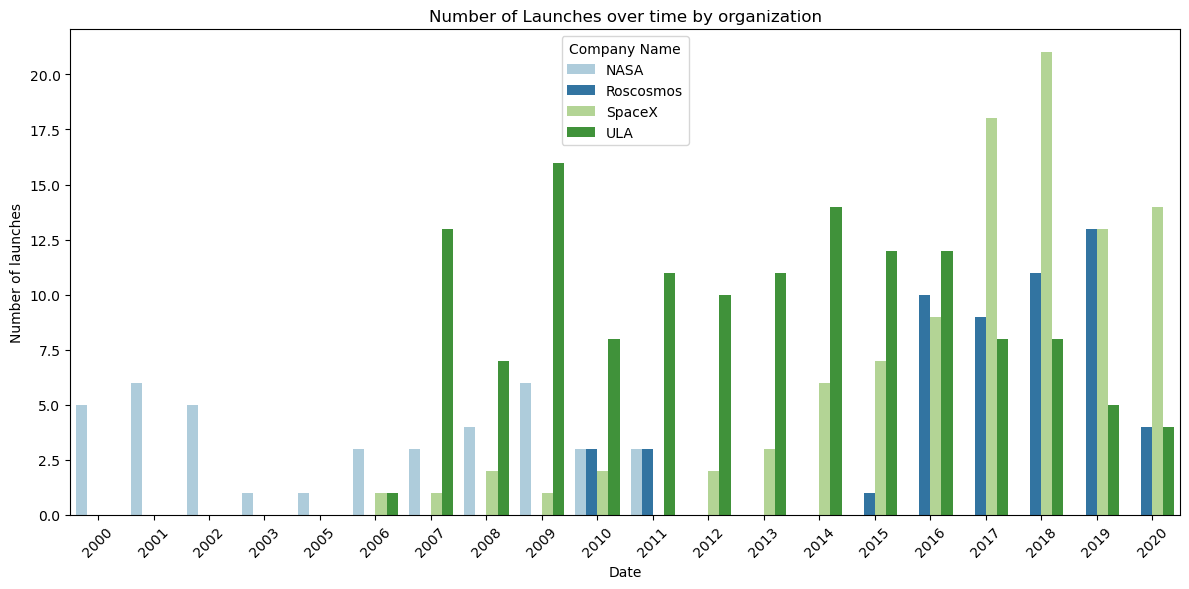

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='Date', y='Launch Count', hue='Company Name', data=updated_groups, palette='Paired')
plt.title('Number of Launches over time by organization')
plt.xlabel('Date')
plt.ylabel('Number of launches')
plt.xticks(rotation=45, size=10)
plt.tight_layout()

Lots of blank space, probably going to split these two

In [24]:
to_2000 = pd.to_datetime('2000-01-01')

In [25]:
russia_and_nasa_names = ['NASA' , 'RVSN USSR']
russia_and_nasa = cleaned_launch_df[cleaned_launch_df['Company Name'].str.contains('|'.join(russia_and_nasa_names))]
russia_and_nasa[russia_and_nasa['Date'] > cutoff_date]
russia_and_nasa

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
682,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Atlantis | STS-135,StatusRetired,450.0,Success,2011-07-08
687,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Endeavour | STS-134,StatusRetired,450.0,Success,2011-05-16
695,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-133,StatusRetired,450.0,Success,2011-02-24
726,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Atlantis | STS-132,StatusRetired,450.0,Success,2010-05-14
733,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-131,StatusRetired,450.0,Success,2010-04-05
...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,1958-09-23
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958-05-15
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958-04-27
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03


In [26]:
new_df = russia_and_nasa[russia_and_nasa['Date'] < to_2000]
new_df


,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
1218,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-103,StatusRetired,450.0,Success,1999-12-20
1241,NASA,"LC-39B, Kennedy Space Center, Florida, USA",Space Shuttle Columbia | STS-93,StatusRetired,450.0,Success,1999-07-23
1250,NASA,"LC-39B, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-96,StatusRetired,450.0,Success,1999-05-27
1278,NASA,"LC-39A, Kennedy Space Center, Florida, USA",Space Shuttle Endeavour | STS-88,StatusRetired,450.0,Success,1998-12-04
1281,NASA,"LC-39B, Kennedy Space Center, Florida, USA",Space Shuttle Discovery | STS-95,StatusRetired,450.0,Success,1998-10-29
...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,1958-09-23
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958-05-15
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958-04-27
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03


In [27]:
test = new_df.groupby(['Date', 'Company Name']).size().reset_index(name='Launch Count')
test

,Date,Company Name,Launch Count
0,1957-10-04,RVSN USSR,1
1,1957-11-03,RVSN USSR,1
2,1958-04-27,RVSN USSR,1
3,1958-05-15,RVSN USSR,1
4,1958-09-23,RVSN USSR,1
...,...,...,...
1813,1998-10-29,NASA,1
1814,1998-12-04,NASA,1
1815,1999-05-27,NASA,1
1816,1999-07-23,NASA,1


In [28]:
comparative_usa_russia = test.groupby(['Company Name', test['Date'].dt.year])['Launch Count'].sum().reset_index()
comparative_usa_russia


,Company Name,Date,Launch Count
0,NASA,1958,2
1,NASA,1959,1
2,NASA,1960,4
3,NASA,1961,12
4,NASA,1962,5
...,...,...,...
69,RVSN USSR,1991,28
70,RVSN USSR,1992,9
71,RVSN USSR,1995,1
72,RVSN USSR,1996,1


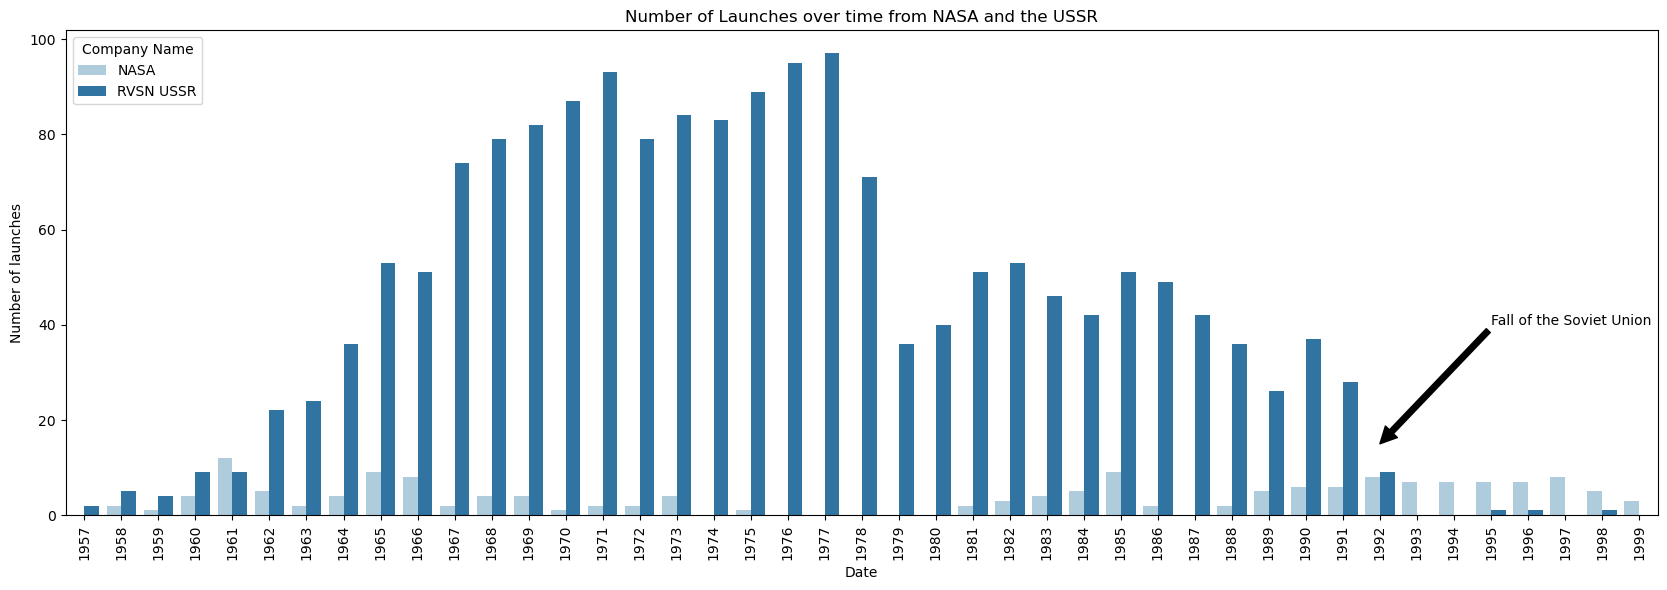

In [29]:
plt.figure(figsize=(17,6))
sns.barplot(x='Date', y='Launch Count', hue='Company Name', data=comparative_usa_russia, palette='Paired')
plt.title('Number of Launches over time from NASA and the USSR')
plt.xlabel('Date')
plt.ylabel('Number of launches')
plt.xticks(rotation=90, size=10)
## plt.arrow(x=40.5, y=20, dx =-3, dy=-3, width=.8, head_width=2)
plt.annotate('Fall of the Soviet Union', xy=[35, 15], xytext=[38, 40], arrowprops=dict(color="black"))
plt.tight_layout()

Now lets wrap it all in a function

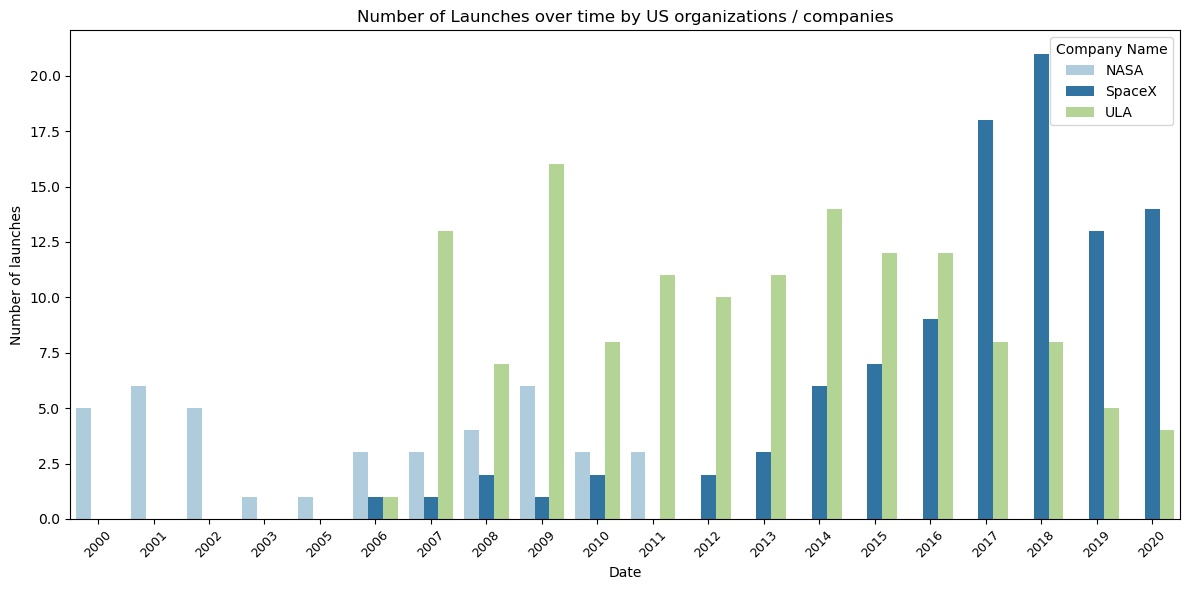

In [30]:
def american_launch_data():
    launch_df = pd.read_csv("data/Space_Corrected.csv")

    cleaned_launch_df = launch_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
    cleaned_launch_df['Date'] = cleaned_launch_df['Datum'].str[:16]
    cleaned_launch_df.drop(columns=['Datum'], inplace=True)
    cleaned_launch_df['Date'] = pd.to_datetime(cleaned_launch_df['Date'], format='%a %b %d, %Y')

    cutoff_date = pd.to_datetime('2000-01-01') ## Fall of the Soviet Union date

    combined_names = ['SpaceX' , 'NASA', 'ULA']
    combined_nasa_spacex_ula = cleaned_launch_df[cleaned_launch_df['Company Name'].str.contains('|'.join(combined_names))]
    america_rahh_df = combined_nasa_spacex_ula[combined_nasa_spacex_ula['Date'] > cutoff_date]
    launch_counts = america_rahh_df.groupby(['Date', 'Company Name']).size().reset_index(name='Launch Count')
    grouped_counts = launch_counts.groupby(['Company Name', launch_counts['Date'].dt.year])['Launch Count'].sum().reset_index()
    
    
    plt.figure(figsize=(12,6))
    sns.barplot(x='Date', y='Launch Count', hue='Company Name', data=grouped_counts, palette='Paired')
    plt.title('Number of Launches over time by US organizations / companies')
    plt.xlabel('Date')
    plt.ylabel('Number of launches')
    plt.xticks(rotation=45, size=9)
    plt.tight_layout()
    
    return plt

american_launch_data().show()

    


    

In [31]:
comparative_usa_russia

,Company Name,Date,Launch Count
0,NASA,1958,2
1,NASA,1959,1
2,NASA,1960,4
3,NASA,1961,12
4,NASA,1962,5
...,...,...,...
69,RVSN USSR,1991,28
70,RVSN USSR,1992,9
71,RVSN USSR,1995,1
72,RVSN USSR,1996,1


In [32]:
cleaned_launch_df


,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03


In [33]:
status_counts = launch_counts.groupby(['Company Name', launch_counts['Date'].dt.year, 'Status Mission'])['Launch Count'].sum().reset_index()
status_counts


,Company Name,Date,Status Mission,Launch Count
0,NASA,2000,Success,5
1,NASA,2001,Success,6
2,NASA,2002,Success,5
3,NASA,2003,Failure,1
4,NASA,2005,Success,1
5,NASA,2006,Success,3
6,NASA,2007,Success,3
7,NASA,2008,Success,4
8,NASA,2009,Success,6
9,NASA,2010,Success,3


In [34]:
status_pivot = status_counts.pivot_table(index=['Company Name', 'Date'], columns='Status Mission', values='Launch Count', fill_value=0).reset_index()
status_pivot

Status Mission,Company Name,Date,Failure,Partial Failure,Prelaunch Failure,Success
0,NASA,2000,0.0,0.0,0.0,5.0
1,NASA,2001,0.0,0.0,0.0,6.0
2,NASA,2002,0.0,0.0,0.0,5.0
3,NASA,2003,1.0,0.0,0.0,0.0
4,NASA,2005,0.0,0.0,0.0,1.0
5,NASA,2006,0.0,0.0,0.0,3.0
6,NASA,2007,0.0,0.0,0.0,3.0
7,NASA,2008,0.0,0.0,0.0,4.0
8,NASA,2009,0.0,0.0,0.0,6.0
9,NASA,2010,0.0,0.0,0.0,3.0


In [35]:


fig = px.bar(status_pivot, x='Date', y=['Failure', 'Partial Failure', 'Prelaunch Failure', 'Success'], 
             color='Company Name',
             title= 'Launches',
             labels={'Date': 'Date', 'value': 'Status Mission', 'variable': 'Status'}).update_layout(xaxis_title='Date', yaxis_title='Status Mission')
fig.show()

In [36]:
soviet_russia = ['Roscosmos' , 'RVSN USSR']
russia_and_soviets = cleaned_launch_df[cleaned_launch_df['Company Name'].str.contains('|'.join(soviet_russia))]
russia_and_soviets

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,2020-07-23
33,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Progress MS-14,StatusActive,48.5,Success,2020-04-25
37,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Soyuz MS-16,StatusActive,48.5,Success,2020-04-09
65,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan",Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.0,Success,2019-12-24
...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,1958-09-23
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958-05-15
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958-04-27
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03


In [37]:
russia_and_soviets.groupby(['Company Name', russia_and_soviets['Date'].dt.year, 'Status Mission'])
russia_and_soviets

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Date
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,2020-07-23
33,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Progress MS-14,StatusActive,48.5,Success,2020-04-25
37,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz 2.1a | Soyuz MS-16,StatusActive,48.5,Success,2020-04-09
65,Roscosmos,"Site 81/24, Baikonur Cosmodrome, Kazakhstan",Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.0,Success,2019-12-24
...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,1958-09-23
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958-05-15
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958-04-27
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03
